# 📊 Market Regime Detection using Hidden Markov Models (HMM)

This notebook uses a Gaussian HMM to identify hidden market regimes in NIFTY 50 index data based on daily log returns.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.1 MB/s eta 0:00:00


/tmp/ipython-input-3989742080.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


=== Regime Analysis ===

Regime 0
Mean return: 0.001091
Volatility:  0.008657
Number of days: 708

Regime 1
Mean return: 0.000223
Volatility:  0.008432
Number of days: 708

Regime 2
Mean return: -0.002438
Volatility:  0.040462
Number of days: 60

=== Transition Matrix (rows = from, cols = to) ===
[[1.31236791e-03 9.98656008e-01 3.16244898e-05]
 [9.73618814e-01 7.71555930e-03 1.86656265e-02]
 [1.30581125e-01 3.37536487e-02 8.35665227e-01]]


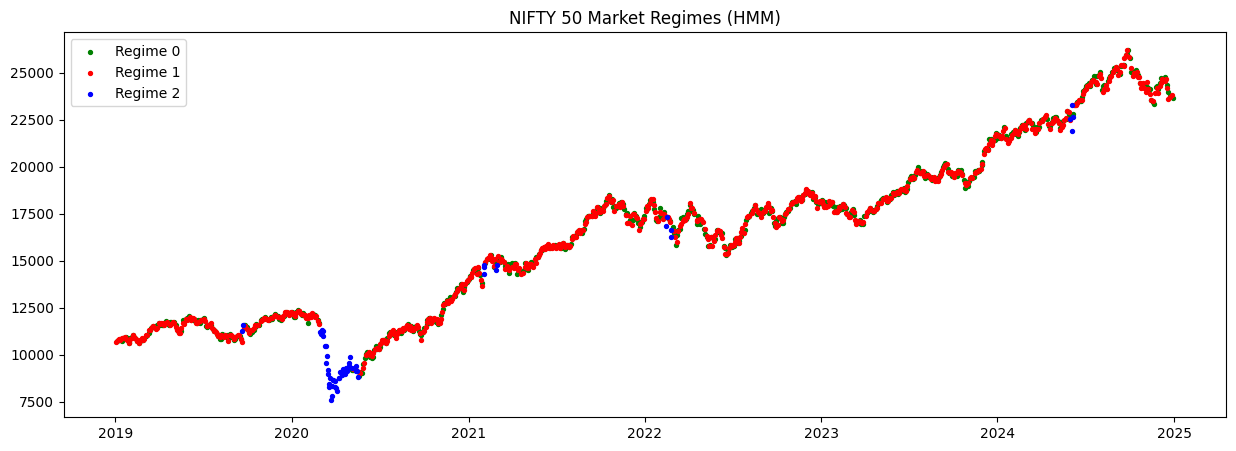

In [2]:
!pip install hmmlearn yfinance

# HMM Market Regime Switching (Clean Version)
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

# Step 1: Download NIFTY data
nifty = yf.download("^NSEI", start="2019-01-01", end="2024-12-31")
nifty = nifty.dropna()

# Step 2: Calculate daily log returns
nifty['LogReturn'] = np.log(nifty['Close'] / nifty['Close'].shift(1))
nifty = nifty.dropna()

# Step 3: Fit Hidden Markov Model (3 regimes)
returns = nifty[['LogReturn']].values   # cleaner than reshape
model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000, random_state=42)
model.fit(returns)

# Predict hidden states
nifty['Regime'] = model.predict(returns)

# Step 4: Analyze regimes
print("=== Regime Analysis ===")
for i in range(model.n_components):
    regime_data = nifty[nifty['Regime'] == i]
    print(f"\nRegime {i}")
    print(f"Mean return: {regime_data['LogReturn'].mean():.6f}")
    print(f"Volatility:  {regime_data['LogReturn'].std():.6f}")
    print(f"Number of days: {len(regime_data)}")

print("\n=== Transition Matrix (rows = from, cols = to) ===")
print(model.transmat_)

# Step 5: Visualize
colors = {0:'green', 1:'red', 2:'blue'}

plt.figure(figsize=(15,5))
for regime in range(model.n_components):
    state_data = nifty[nifty['Regime'] == regime]
    plt.scatter(state_data.index, state_data['Close'],
                label=f'Regime {regime}',
                c=colors[regime], s=8)

plt.title("NIFTY 50 Market Regimes (HMM)")
plt.legend()
plt.show()
